# **EDA**

In [42]:
! pip install catboost

In [43]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/cars_clus.csv')

In [44]:
df

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0
1,Acura,TL,39.384,19.875,0,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0
2,Acura,RL,8.588,29.725,0,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0
3,Audi,A4,20.397,22.255,0,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0
4,Audi,A6,18.780,23.555,0,33.95,2.8,200,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,Volkswagen,Golf,9.761,11.425,0,14.90,2.0,115,98.9,68.3,163.3,2.767,14.5,26.0,2.278,0
113,Volkswagen,Jetta,83.721,13.240,0,16.70,2.0,115,98.9,68.3,172.3,2.853,14.5,26.0,4.427,0
114,Volkswagen,Passat,51.102,16.725,0,21.20,1.8,150,106.4,68.5,184.1,3.043,16.4,27.0,3.934,0
115,Volkswagen,Cabrio,9.569,16.575,0,19.99,2.0,115,97.4,66.7,160.4,3.079,13.7,26.0,2.259,0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   manufact   117 non-null    object 
 1   model      117 non-null    object 
 2   sales      117 non-null    float64
 3   resale     117 non-null    float64
 4   type       117 non-null    int64  
 5   price      117 non-null    float64
 6   engine_s   117 non-null    float64
 7   horsepow   117 non-null    int64  
 8   wheelbas   117 non-null    float64
 9   width      117 non-null    float64
 10  length     117 non-null    float64
 11  curb_wgt   117 non-null    float64
 12  fuel_cap   117 non-null    float64
 13  mpg        117 non-null    float64
 14  lnsales    117 non-null    float64
 15  partition  117 non-null    int64  
dtypes: float64(11), int64(3), object(2)
memory usage: 14.8+ KB


In [46]:
df.dtypes

manufact      object
model         object
sales        float64
resale       float64
type           int64
price        float64
engine_s     float64
horsepow       int64
wheelbas     float64
width        float64
length       float64
curb_wgt     float64
fuel_cap     float64
mpg          float64
lnsales      float64
partition      int64
dtype: object

In [47]:
len(df)

117

In [48]:
print(df.isnull().sum())

manufact     0
model        0
sales        0
resale       0
type         0
price        0
engine_s     0
horsepow     0
wheelbas     0
width        0
length       0
curb_wgt     0
fuel_cap     0
mpg          0
lnsales      0
partition    0
dtype: int64


In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sales,117.0,59.112316,75.058933,0.110,16.767,32.299,76.029,540.561
resale,117.0,18.031538,11.605632,5.160,11.240,14.010,19.875,67.550
type,117.0,0.247863,0.433629,0.000,0.000,0.000,0.000,1.000
price,117.0,25.969487,14.149699,9.235,16.980,21.665,29.465,82.600
engine_s,117.0,3.048718,1.055169,1.000,2.200,3.000,3.800,8.000
horsepow,117.0,181.282051,58.591786,55.000,140.000,175.000,210.000,450.000
wheelbas,117.0,107.326496,8.050588,92.600,102.400,107.000,111.600,138.700
width,117.0,71.189744,3.530151,62.600,68.500,70.400,73.600,79.300
length,117.0,187.717949,13.849926,149.400,177.500,187.800,196.500,224.500
curb_wgt,117.0,3.324051,0.597177,1.895,2.911,3.340,3.823,5.115


In [50]:
df1 = df.copy(deep = True)
df1.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0
1,Acura,TL,39.384,19.875,0,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0
2,Acura,RL,8.588,29.725,0,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0
3,Audi,A4,20.397,22.255,0,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0
4,Audi,A6,18.780,23.555,0,33.95,2.8,200,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0


In [51]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

<ipython-input-52-006f368792d8>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price']);
<ipython-input-52-006f368792d8>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['price']);


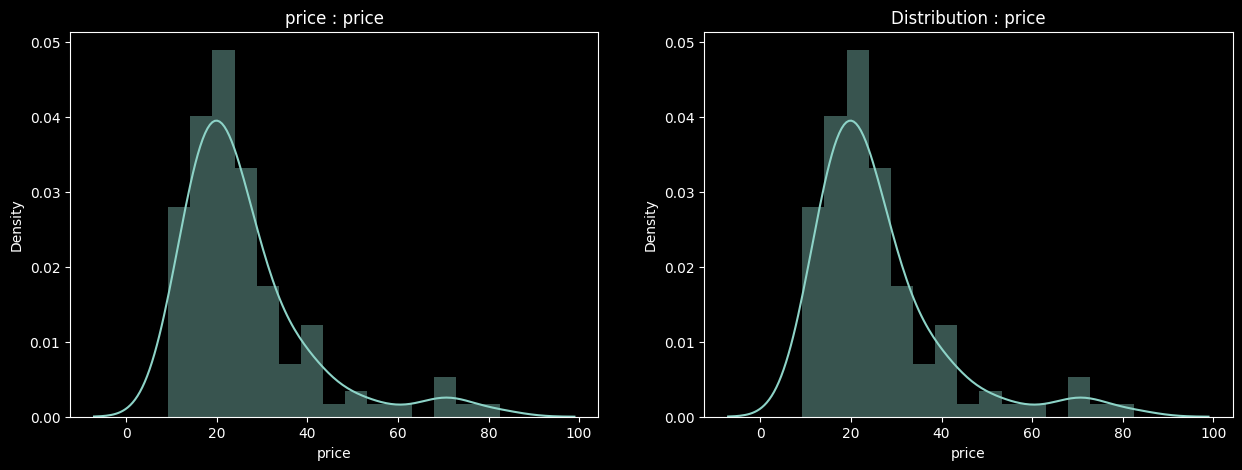

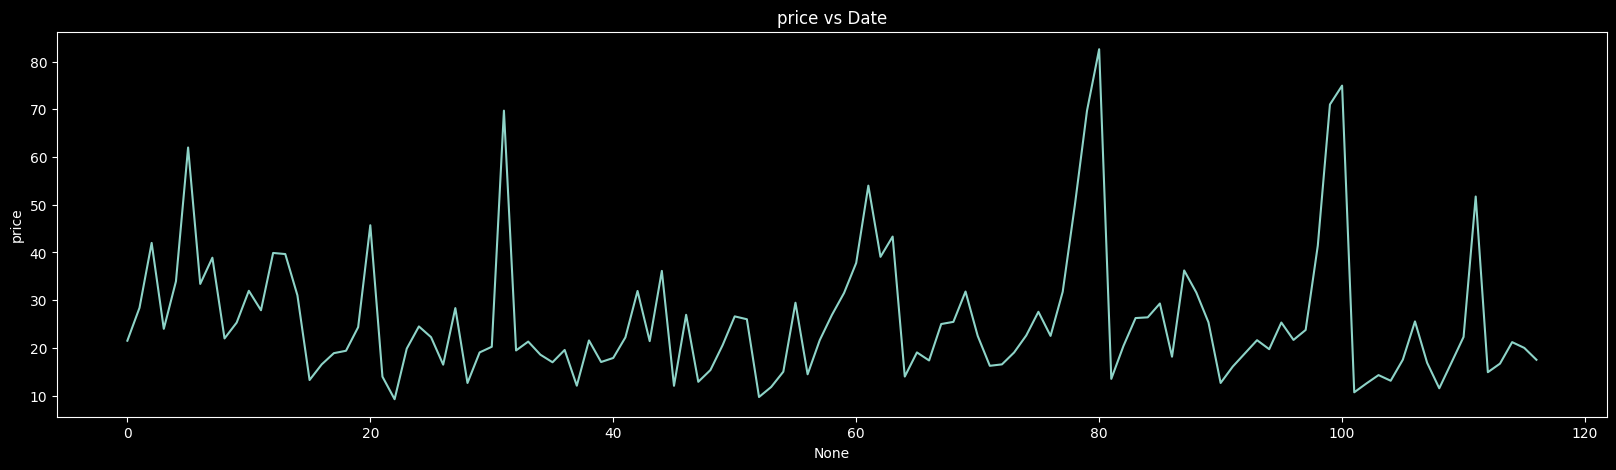

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt


fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize = (15,5))

plt.subplot(1,2,1)
sns.distplot(df['price']);
plt.title('price : price')

plt.subplot(1,2,2)
sns.distplot(df1['price']);
plt.title('Distribution : price')

fig,ax = plt.subplots(nrows = 1, ncols = 1,figsize = (20,5))
plt.subplot(1,1,1)
sns.lineplot(x = df1.index ,y = 'price',data = df1);
plt.title('price vs Date')

plt.show()
fig.tight_layout(pad = 2)

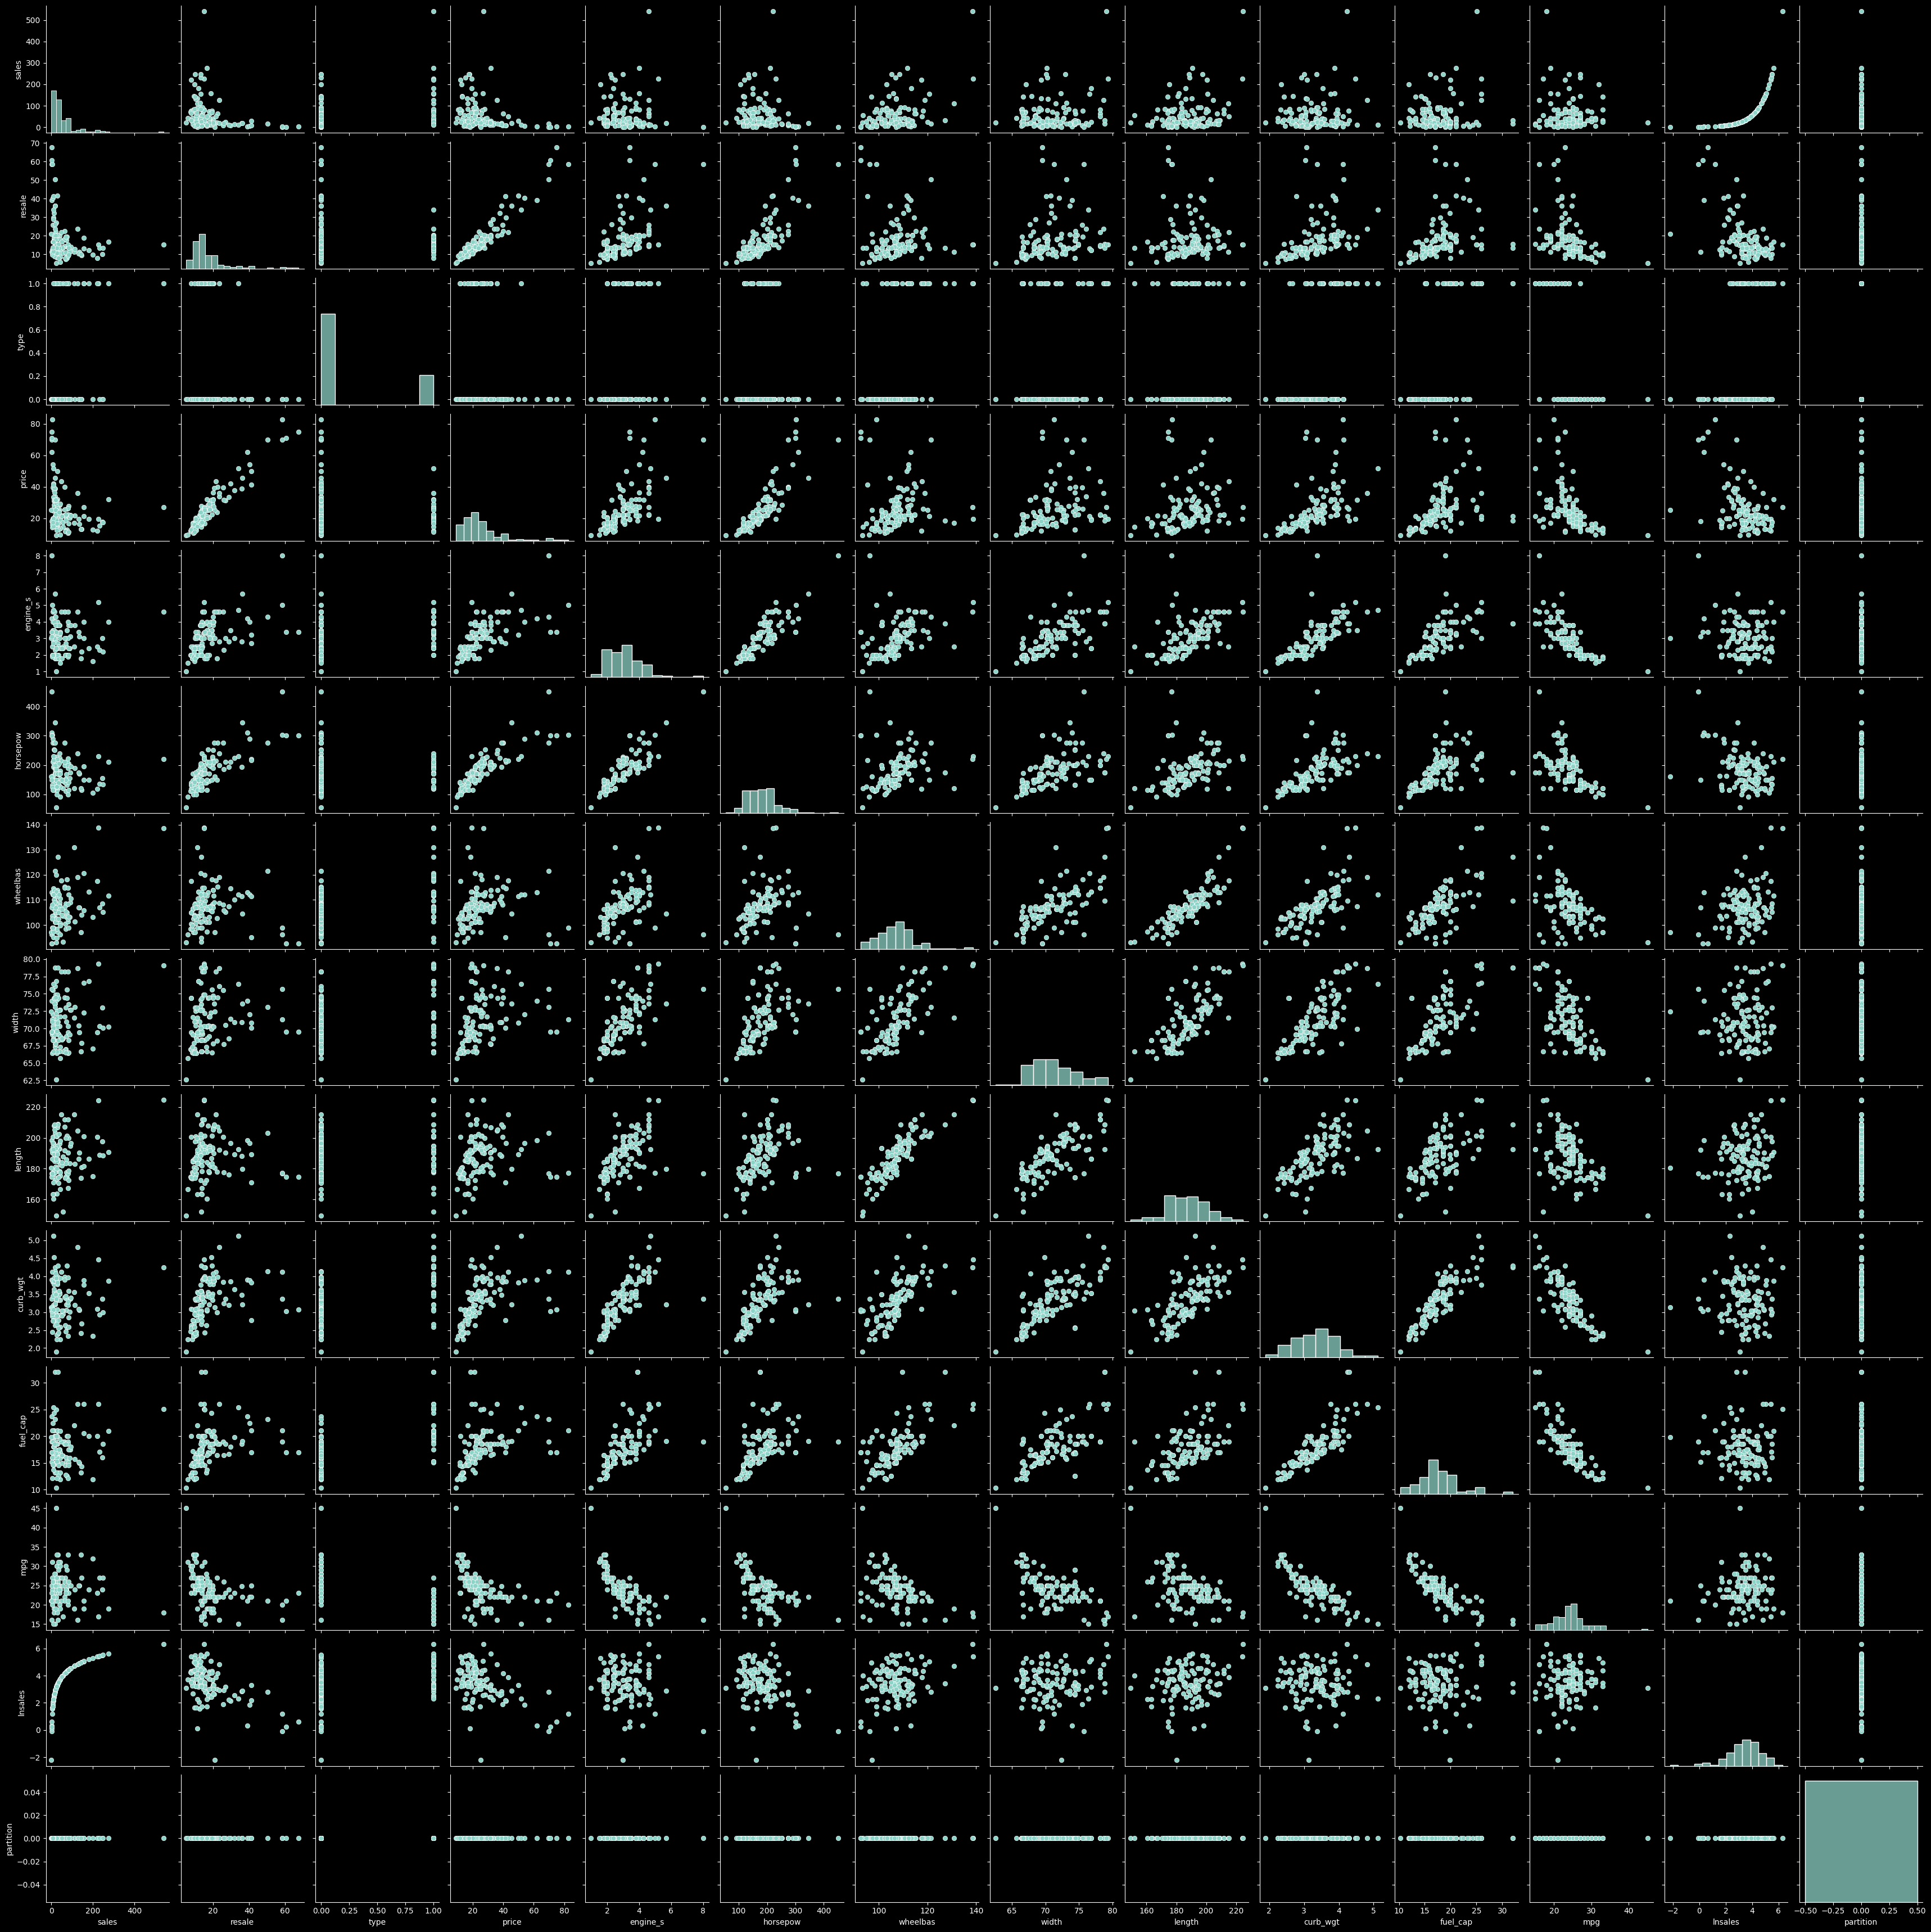

In [53]:
sns.pairplot(df)
plt.show()

In [54]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df,train_size=0.8,random_state=42)
val, test = train_test_split(test,train_size=0.5,random_state=42)

In [55]:
len(train)

93

In [56]:
len(test)

12

In [57]:
len(val)

12

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93 entries, 15 to 102
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   manufact   93 non-null     object 
 1   model      93 non-null     object 
 2   sales      93 non-null     float64
 3   resale     93 non-null     float64
 4   type       93 non-null     int64  
 5   price      93 non-null     float64
 6   engine_s   93 non-null     float64
 7   horsepow   93 non-null     int64  
 8   wheelbas   93 non-null     float64
 9   width      93 non-null     float64
 10  length     93 non-null     float64
 11  curb_wgt   93 non-null     float64
 12  fuel_cap   93 non-null     float64
 13  mpg        93 non-null     float64
 14  lnsales    93 non-null     float64
 15  partition  93 non-null     int64  
dtypes: float64(11), int64(3), object(2)
memory usage: 12.4+ KB


In [59]:
train.columns

Index(['manufact', 'model', 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales', 'partition'],
      dtype='object')

# **ML(Catboost)**

In [60]:
from catboost import Pool, CatBoostRegressor

In [61]:
X = ['manufact', 'model', 'sales', 'resale', 'type', 'engine_s',
      'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
      'mpg', 'lnsales', 'partition']

cat_features = ['manufact', 'model']

y = ['price']

In [62]:
parameters = {'cat_features': cat_features,
              'iterations' : 1500,
              'eval_metric': 'MAE',
              'loss_function' : 'MAE',
              'learning_rate': 0.1,
              'random_seed':42,
              'verbose':100}


In [63]:
model = CatBoostRegressor(**parameters)

In [64]:
model.fit(train[X],train[y],eval_set=(val[X],val[y]))

0:	learn: 9.0496689	test: 5.8667073	best: 5.8667073 (0)	total: 10.6ms	remaining: 15.9s
100:	learn: 0.4705363	test: 2.9163374	best: 2.5393831 (28)	total: 332ms	remaining: 4.6s
200:	learn: 0.1551748	test: 3.0828857	best: 2.5393831 (28)	total: 547ms	remaining: 3.53s
300:	learn: 0.0680838	test: 3.1324064	best: 2.5393831 (28)	total: 722ms	remaining: 2.88s
400:	learn: 0.0329973	test: 3.1237818	best: 2.5393831 (28)	total: 891ms	remaining: 2.44s
500:	learn: 0.0161617	test: 3.1310285	best: 2.5393831 (28)	total: 1.07s	remaining: 2.14s
600:	learn: 0.0101671	test: 3.1301212	best: 2.5393831 (28)	total: 1.24s	remaining: 1.85s
700:	learn: 0.0061149	test: 3.1303066	best: 2.5393831 (28)	total: 1.4s	remaining: 1.59s
800:	learn: 0.0033316	test: 3.1308651	best: 2.5393831 (28)	total: 1.57s	remaining: 1.37s
900:	learn: 0.0026819	test: 3.1308655	best: 2.5393831 (28)	total: 1.73s	remaining: 1.15s
1000:	learn: 0.0019946	test: 3.1310867	best: 2.5393831 (28)	total: 1.9s	remaining: 947ms
1100:	learn: 0.0014017	te

In [65]:
train['price_pred'] = model.predict(train[X])
test['price_pred'] = model.predict(test[X])
val['price_pred'] = model.predict(val[X])

In [66]:
train

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,price_pred
15,Chevrolet,Cavalier,145.519,9.250,0,13.260,2.2,115,104.1,67.9,180.9,2.676,14.3,27.0,4.980,0,14.702470
69,Mitsubishi,Montero,11.337,19.125,1,31.807,3.5,200,107.3,69.9,186.6,4.520,24.3,18.0,2.428,0,29.813403
31,Dodge,Viper,0.916,58.470,0,69.725,8.0,450,96.2,75.7,176.7,3.375,19.0,16.0,-0.088,0,57.307388
24,Chrysler,Sebring Conv.,32.775,14.180,0,24.495,2.5,168,106.0,69.2,193.0,3.332,16.0,24.0,3.490,0,22.539246
56,Jeep,Wrangler,55.557,13.475,1,14.460,2.5,120,93.4,66.7,152.0,3.045,19.0,17.0,4.017,0,15.877301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,Toyota,Avalon,63.849,18.140,0,25.545,3.0,210,107.1,71.7,191.9,3.417,18.5,26.0,4.157,0,26.298932
14,Cadillac,Catera,11.185,18.225,0,31.010,3.0,200,107.4,70.3,194.8,3.770,18.0,22.0,2.415,0,30.676865
92,Plymouth,Voyager,24.155,12.025,1,18.850,2.4,150,113.3,76.8,186.3,3.528,20.0,24.0,3.184,0,18.868983
51,Honda,Odyssey,76.029,19.490,1,26.000,3.5,210,118.1,75.6,201.2,4.288,20.0,23.0,4.331,0,26.336799


In [67]:
test

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,price_pred
36,Dodge,Caravan,181.749,12.025,1,19.565,2.4,150,113.3,76.8,186.3,3.533,20.0,24.0,5.203,0,18.024618
62,Lincoln,Continental,13.798,20.525,0,39.080,4.6,275,109.0,73.6,208.5,3.868,20.0,22.0,2.625,0,41.574006
44,Ford,Expedition,125.338,23.575,1,36.135,4.6,240,119.0,78.7,204.6,4.808,26.0,16.0,4.831,0,26.380378
76,Mercury,Villager,20.380,14.795,1,22.510,3.3,170,112.2,74.9,194.7,3.944,20.0,21.0,3.015,0,24.315238
26,Chrysler,Cirrus,32.306,12.640,0,16.480,2.0,132,108.0,71.0,186.0,2.911,16.0,27.0,3.475,0,17.354555
11,Buick,LeSabre,83.257,13.360,0,27.885,3.8,205,112.2,73.5,200.0,3.591,17.5,25.0,4.422,0,21.967722
104,Toyota,Corolla,142.535,10.025,0,13.108,1.8,120,97.0,66.7,174.0,2.420,13.2,33.0,4.960,0,13.047130
4,Audi,A6,18.780,23.555,0,33.950,2.8,200,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0,34.724301
89,Oldsmobile,Silhouette,24.361,15.240,1,25.345,3.4,185,120.0,72.2,201.4,3.948,25.0,22.0,3.193,0,25.334146
85,Nissan,Pathfinder,42.574,17.810,1,29.299,3.3,170,106.3,71.7,182.6,3.947,21.0,19.0,3.751,0,24.933014


In [68]:
test['error_abs'] = abs(test['price'] - test['price_pred'])
test['error'] = test['price'] - test['price_pred']

array([[<Axes: title={'center': 'error'}>,
        <Axes: title={'center': 'error_abs'}>]], dtype=object)

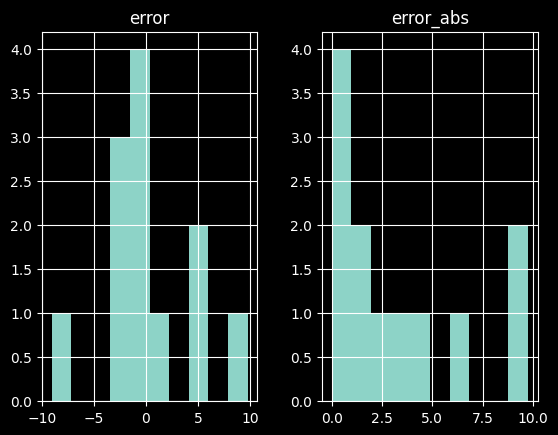

In [69]:
test[['error', 'error_abs']].hist()

In [70]:
test['error'].mean()

0.2752267783392339

MAE: 2.539384208436578
MSE: 13.02564391366392
RMSE: 3.60910569444342
R^2: 0.7966523555675007


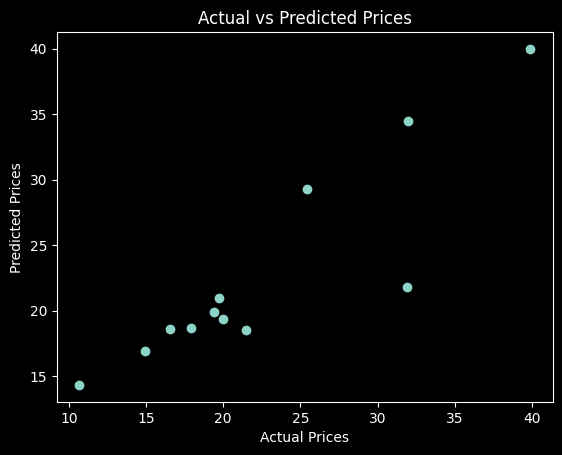

In [71]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.metrics import r2_score

y_pred = model.predict(val[X])

y_true = val[y]

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)
r2 = r2_score(y_true, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')


plt.scatter(y_true, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

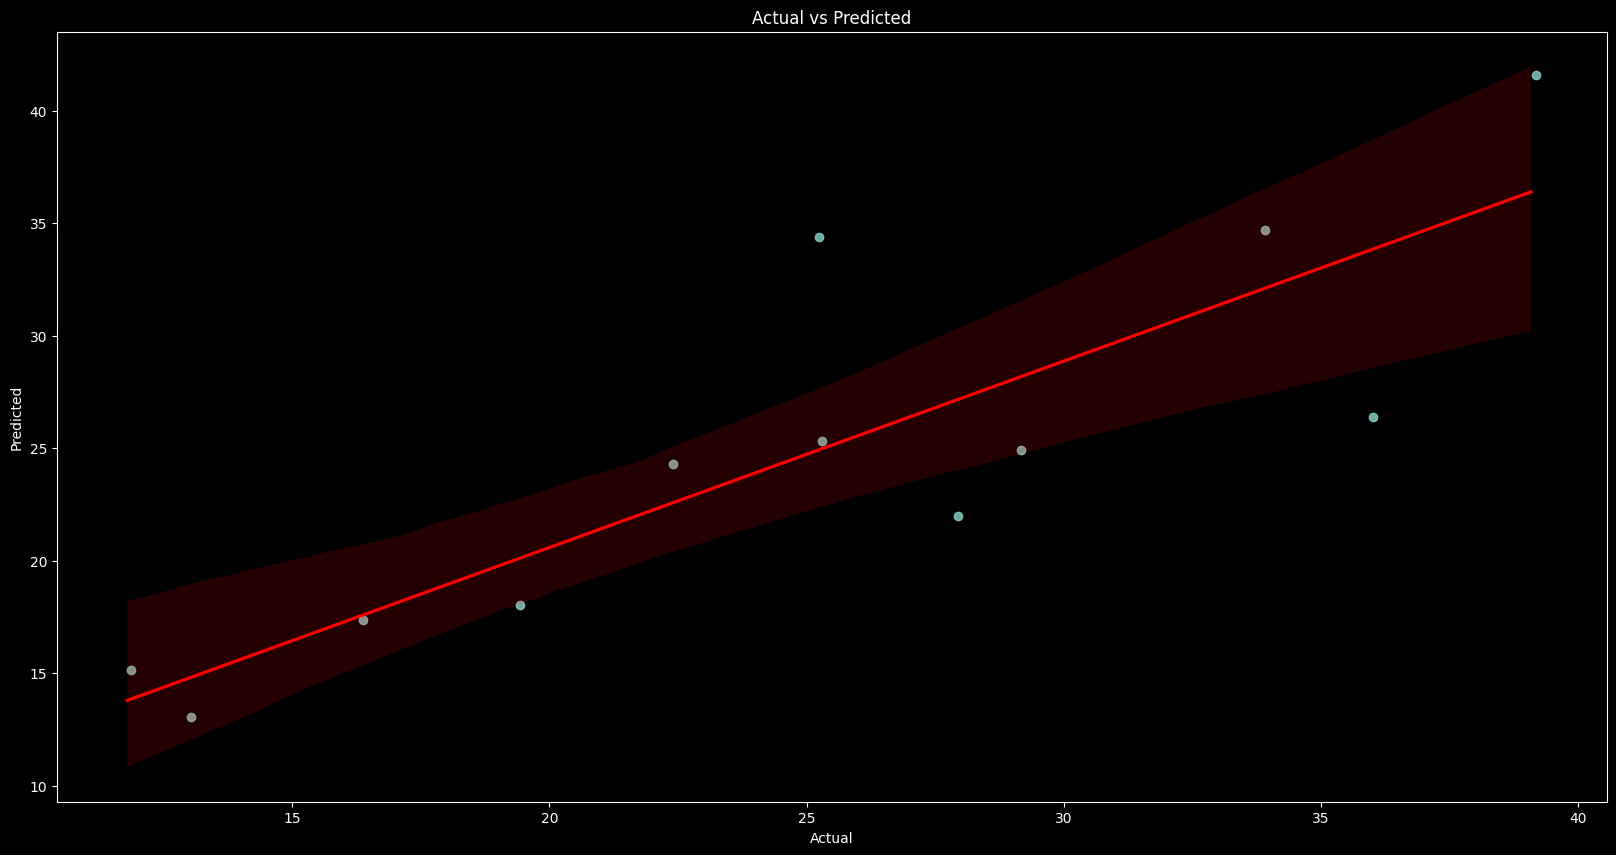

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 10))
sns.regplot(data=df, x=test['price'], y=test['price_pred'], x_jitter=.15, line_kws=dict(color="r"),)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.ticklabel_format(style = 'plain')